# MNIST Hand Digit Recognition - using Neural Networks 

In [1]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import confusion_matrix

%matplotlib inline

Using TensorFlow backend.


In [0]:
# Load MNIST hand digit recognition dataset
mnist = tf.keras.datasets.mnist

In [3]:
# Normalization of features
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
# Training dataset information
print('Shape of training feature example: ', x_train[0].shape)
print('Shape of training examples: ', x_train.shape)
print('Number of training examples: ', len(x_train))
print('Shape of training labels: ', y_train.shape)
print('Number of training labels: ', len(y_train))

Shape of training feature example:  (28, 28)
Shape of training examples:  (60000, 28, 28)
Number of training examples:  60000
Shape of training labels:  (60000,)
Number of training labels:  60000


In [5]:
# Testing dataset information
print('Testing examples shape: ', x_test.shape)
print('Number of testing examples: ', len(x_test))
print('Testing labels shape: ', y_test.shape)
print('Number of testing lables: ', len(y_test))      

Testing examples shape:  (10000, 28, 28)
Number of testing examples:  10000
Testing labels shape:  (10000,)
Number of testing lables:  10000


In [0]:
# One hot encoding taining labels
one_hot_labels = tf.keras.utils.to_categorical(y_train, num_classes=10)

# Print one hot encoded labels
one_hot_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

First 4 hand digit training examples:


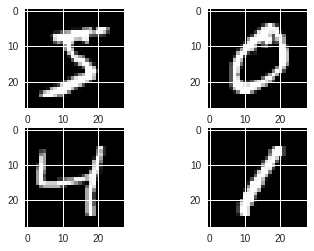

Corresponding output labels:  [5 0 4 1]


In [0]:
# Show first 4 hand digit recognition data
print('First 4 hand digit training examples:')
plt.subplot(221)
plt.imshow(x_train[0], cmap='gray')
plt.subplot(222)
plt.imshow(x_train[1], cmap='gray')
plt.subplot(223)
plt.imshow(x_train[2], cmap='gray')
plt.subplot(224)
plt.imshow(x_train[3], cmap='gray')
plt.show()

print('Corresponding output labels: ', y_train[0:4])

In [0]:
# Build keras sequential model
model = Sequential()
model.add(Dense(128, input_shape=(28, 28))) 
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dense(64)) 
model.add(Activation('relu'))          
model.add(Dense(10, activation=tf.nn.softmax))

In [0]:
# model summary 
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 28, 128)           3712      
_________________________________________________________________
flatten_10 (Flatten)         (None, 3584)              0         
_________________________________________________________________
activation_37 (Activation)   (None, 3584)              0         
_________________________________________________________________
dense_59 (Dense)             (None, 64)                229440    
_________________________________________________________________
activation_38 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                650       
Total params: 233,802
Trainable params: 233,802
Non-trainable params: 0
_________________________________________________________________
None

In [0]:
# Compile
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the NN model without validation set

In [0]:
# fit the model without validation set
history_wo_val_set = model.fit(x_train, one_hot_labels, epochs=10, batch_size=500, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4578 - acc: 0.8793
Epoch 2/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1809 - acc: 0.9476
Epoch 3/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.1383 - acc: 0.9602
Epoch 4/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.1134 - acc: 0.9672
Epoch 5/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0971 - acc: 0.9723
Epoch 6/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0859 - acc: 0.9751
Epoch 7/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0757 - acc: 0.9774
Epoch 8/10
60000/60000 [==============================] - 5s 77us/step - loss: 0.0669 - acc: 0.9801
Epoch 9/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.0590 - acc: 0.9825
Epoch 10/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.0528 - acc: 0.9846

In [0]:
# Train test plot for model without validation set
def plot_history(history):
  '''
  Plots train validation set error and accuracy
  
  Arguments:
  history -- model history
  '''
  
  plt.subplot(211)
  plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()

  plt.subplot(212)
  plt.plot(history.epoch, np.array(history.history['acc']), label='Train Acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  
  plt.show()

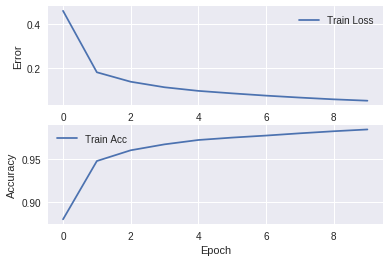

In [0]:
# plot
plot_history(history_wo_val_set)

In [0]:
# Model predict labels
y_predicted = model.predict(x_test)

# Invert one-hot-encoded values
y_predicted = np.argmax(y_predicted, axis=1)
print(y_predicted)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [0]:
# Model predict labels
y_predicted = model.predict(x_test)

# Invert one-hot-encoded values
y_predicted = np.argmax(y_predicted, axis=1)
print(y_predicted)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [0]:
# Evaluate the model - loss value and metric (accuracy) value
one_hot_encode_test_label = tf.keras.utils.to_categorical(y_test, num_classes=10)
scores = model.evaluate(x_test, one_hot_encode_test_label, verbose=0)
print(scores)
print("Test Error: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))

[0.07957200876018032, 0.9751]
Test Error: 7.96%
Test Accuracy: 97.51%


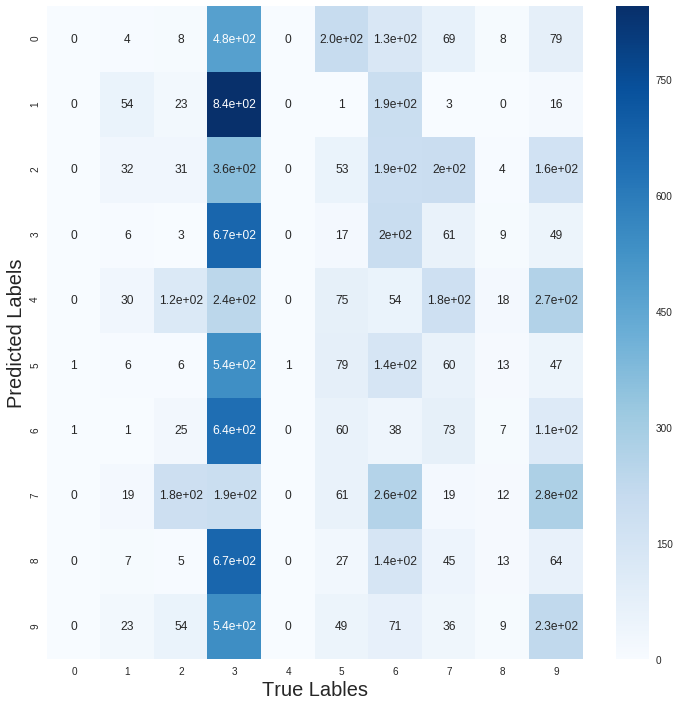

In [0]:
# Confusion matrix 
cmap = plt.cm.Blues
cm = confusion_matrix(y_test, invert)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cmap='Blues')
plt.xlabel('True Lables', fontsize=20)
plt.ylabel('Predicted Labels', fontsize=20)
plt.show()

# Fit the NN model with validation set

In [0]:
# fit the model with validation set
history_w_val_set = model.fit(x_train, one_hot_labels, validation_split=0.2, epochs=10, batch_size=500, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0462 - acc: 0.9869 - val_loss: 0.0491 - val_acc: 0.9851
Epoch 2/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.0426 - acc: 0.9875 - val_loss: 0.0550 - val_acc: 0.9836
Epoch 3/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.0369 - acc: 0.9895 - val_loss: 0.0484 - val_acc: 0.9855
Epoch 4/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0332 - acc: 0.9908 - val_loss: 0.0493 - val_acc: 0.9846
Epoch 5/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0314 - acc: 0.9908 - val_loss: 0.0542 - val_acc: 0.9837
Epoch 6/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0264 - acc: 0.9932 - val_loss: 0.0506 - val_acc: 0.9851
Epoch 7/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.0219 - acc: 0.9945 - val_loss: 0.0533 - val_acc

In [0]:
# Train test plot for model with validation set
def plot_history(history):
  '''
  Plots train validation set error and accuracy
  
  Arguments:
  history -- model history
  '''
  
  plt.subplot(211)
  plt.plot(history.epoch, np.array(history.history['loss']), label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_loss']), label='Val Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()

  plt.subplot(212)
  plt.plot(history.epoch, np.array(history.history['acc']), label='Train Acc')
  plt.plot(history.epoch, np.array(history.history['val_acc']), label='Val Acc')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  
  plt.show()

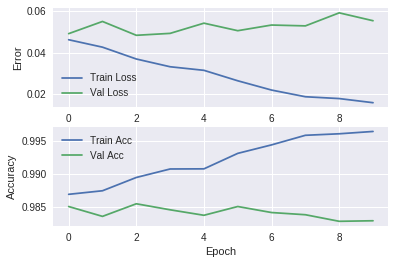

In [0]:
# plot
plot_history(history_w_val_set)

In [0]:
# Model predict labels
y_predicted = model.predict(x_test)

# Invert one-hot-encoded values
y_predicted = np.argmax(y_predicted, axis=1)
print(y_predicted)
print(y_test)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [0]:
# Evaluate the model - loss value and metric (accuracy) value
one_hot_encode_test_label = tf.keras.utils.to_categorical(y_test, num_classes=10)
scores = model.evaluate(x_test, one_hot_encode_test_label, verbose=0)
print(scores)
print("Test Error: %.2f%%" % (scores[0]*100))
print("Test Accuracy: %.2f%%" % (scores[1]*100))

[0.07724624028621474, 0.977]
Test Error: 7.72%
Test Accuracy: 97.70%


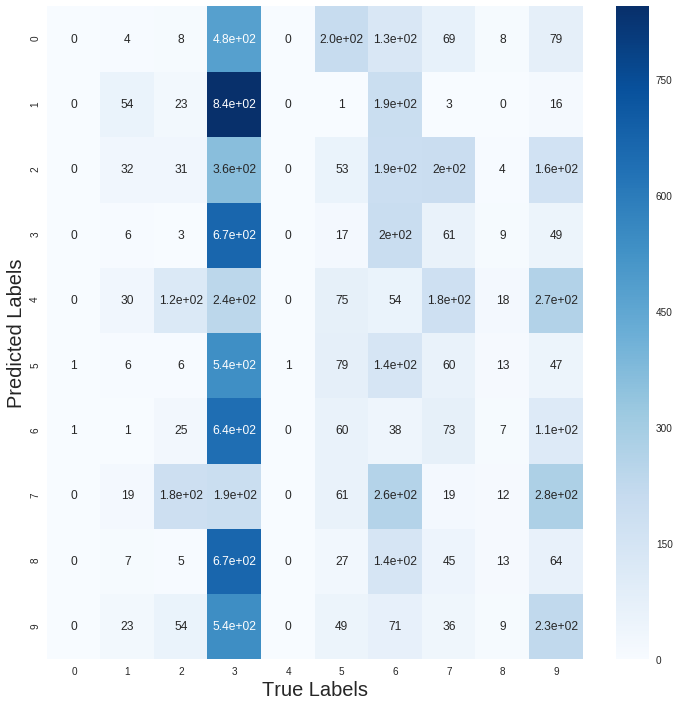

In [0]:
# Confusion matrix 
cmap = plt.cm.Blues
cm = confusion_matrix(y_test, invert)
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cmap='Blues')
plt.xlabel('True Labels', fontsize=20)
plt.ylabel('Predicted Labels', fontsize=20)
plt.show()